<h3>USFWS Pea Island Plot Group 6 Biol Counts</h4>

**Supports:**

dates=['2014-07-14 00:00:00','2014-07-15 00:00:00','2014-09-29 00:00:00','2015-04-28 00:00:00','2015-08-04 00:00:00','2015-10-20 00:00:00','2016-02-17 00:00:00','2016-05-10 00:00:00','2016-08-09 00:00:00','2016-10-13 00:00:00']

surveys=[201407,201407,201409,201504,201508,201510,201602,201605,201608,201610]

<br />
**Instructions for use:**
1. Export the table Biological Counts from the master geodatabase PIBM_Master.accdb to a tab separated text file. Title it PeaIsland_BioCounts.txt. If you elect to use a different name, be sure to make the change in the user inputs cell, below, to reflect. Too, If you should choose to export using a field separator other than the tab (x09) you'll have to update the Load Data File cell. 
2. Check the User Inputs cell, ensuring that the path and name of the exported bioCounts source file is correct. 
3. Cell -> Run All

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math 
import datetime

%matplotlib inline

**Function PlotCountsAboveBars**
Places (prints) the total value count for each "critter" atop the transect bar (aggregated for cntrol and treatment separately) in the bio count barplots. The function is called by each of the plot operations in the Plotting Section of this notebook.

In [49]:
# Function: PlotCountsAboveBars
def PlotCountsAboveBars():
    # Get current axis on current figure
    ax = plt.gca()

    # Iterate through the list of axes' patches
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

In [50]:
### User Inputs:
datapath='/Users/paulp/GoogleDrive/projects/PeaIslandBeachMonitoring/data/'
fn='BiologicalCounts.csv' #'PeaIsland_BioCounts.txt'

latest_survey='201708'  # most recent survey - use for labeling plot graphics...

plotpath='/Users/paulp/GoogleDrive/projects/PeaIslandBeachMonitoring/plots/PlotGroup6/'

In [ ]:
### Load Data File:

# read the new survey data (the most recent survey data that will be merged with the existing coverage 
# in the file BioCounts.csv)
df=pd.read_table(datapath+fn, header=0 ).fillna(0)
df.columns=["key","BIO_UID","sheet_code","sample_date","transect_id","sample_number","ghost_crabs",
"small_mole_crabs","med_mole_crabs","large_mole_crabs","coquina","amphipods","worms"]

## create and populate new group column (field) based on transect id type (e.g., control or transect):
df.loc[df['transect_id'].str[0] == 'C', 'group'] ='control'
df.loc[df['transect_id'].str[0] =='T', 'group'] = 'treatment'

# convert the ISO 8601 datetime field to Python datetime object and then to integers as in the surveys list
# in the Supports section of this notebook. These converted dates are then used to populate a newly created 
# survey field in df (use a lambda func to pull it off):
try:
    datetime2survey = lambda i: datetime.datetime.strptime(i,"%Y-%m-%d %H:%M:%S").strftime('%Y%m')
    df['survey'] = df['sample_date'].apply( datetime2survey )
except ValueError as e:
    print('Oops! ', str(e))

df.sort_values(by=['survey'], inplace=True)
df

In [52]:
#df.survey.unique()
print( df['ghost_crabs'].where((df['survey'] == '201704') & ( df['group'] == 'control')).sum())
print(df['ghost_crabs'].where((df['survey'] == '201704') & ( df['group'] == 'treatment')).sum())

41.0
38.0


<h3>Plotting Section</h3>

In [ ]:
df.loc[df['survey'] == '201702']

In [54]:
### some general settings, common to all plots...
sns.set_color_codes("pastel")
sns.despine(offset=10, trim=True)

**Ghost Crabs**

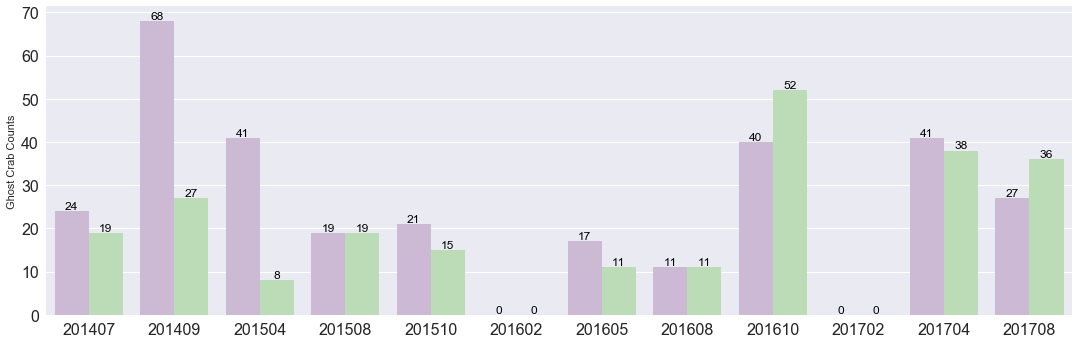

In [55]:
g = sns.factorplot(x="survey", y="ghost_crabs", hue="group", data=df,
                    size=5, aspect=3, estimator=sum, kind="bar", 
                   hue_order=['control','treatment'], ci=None, legend=False, palette="PRGn")
###"PRGn"
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
g.set_axis_labels("", "Ghost Crab Counts")

# to place the field counts for coquina clams recorded during each of the 12 sampling events
PlotCountsAboveBars()
plt.savefig(plotpath+'Ghost_Crab_counts_'+latest_survey+'.jpg', dpi=300)

**Small Mole Crabs**

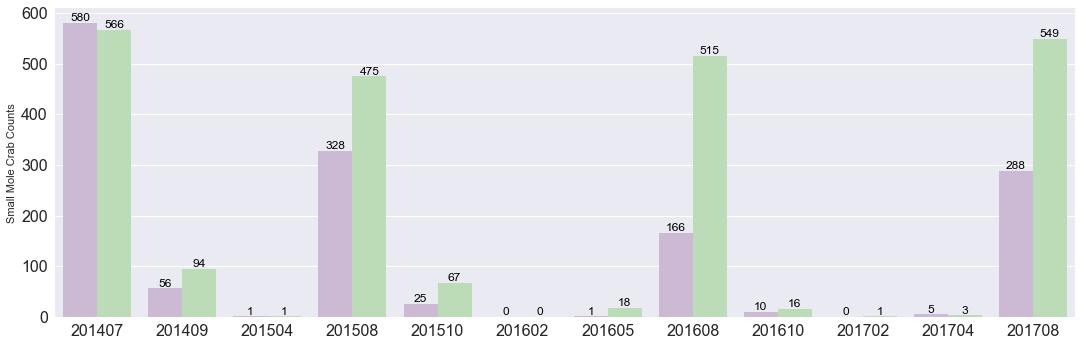

In [56]:
g = sns.factorplot(x="survey", y="small_mole_crabs", hue="group", data=df,
                    size=5, aspect=3, estimator=sum, kind="bar", 
                   hue_order=['control','treatment'], ci=None, legend=False, palette="PRGn")

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
g.set_axis_labels("", "Small Mole Crab Counts")

# to place the field counts for coquina clams recorded during each of the 12 sampling events
PlotCountsAboveBars()
plt.savefig(plotpath+'Sample_Sm_Mole_Crab_counts_'+latest_survey+'.jpg', dpi=300)

**Medium Mole Crabs**

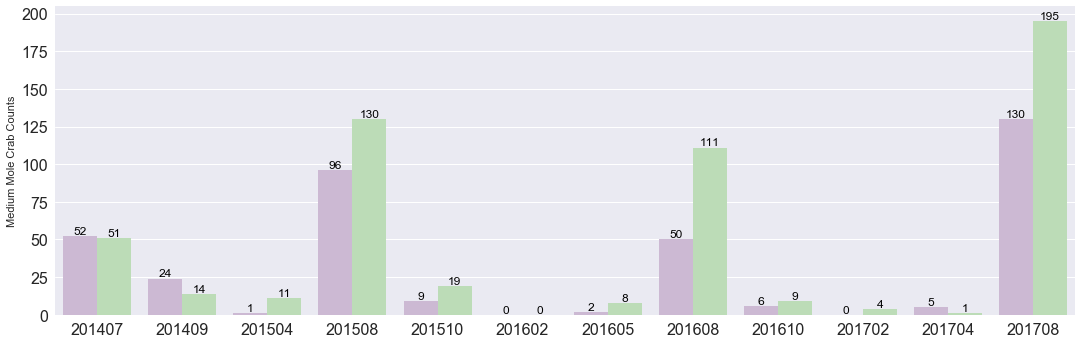

In [57]:
g = sns.factorplot(x="survey", y="med_mole_crabs", hue="group", data=df,
                    size=5, aspect=3, estimator=sum, kind="bar", 
                   hue_order=['control','treatment'], ci=None, legend=False, palette="PRGn")

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
g.set_axis_labels("", "Medium Mole Crab Counts")

# to place the field counts for coquina clams recorded during each of the 12 sampling events
PlotCountsAboveBars()

plt.savefig(plotpath+'Sample_Med_Mole_Crab_counts_'+latest_survey+'.jpg', dpi=300)

**Large Mole Crabs**

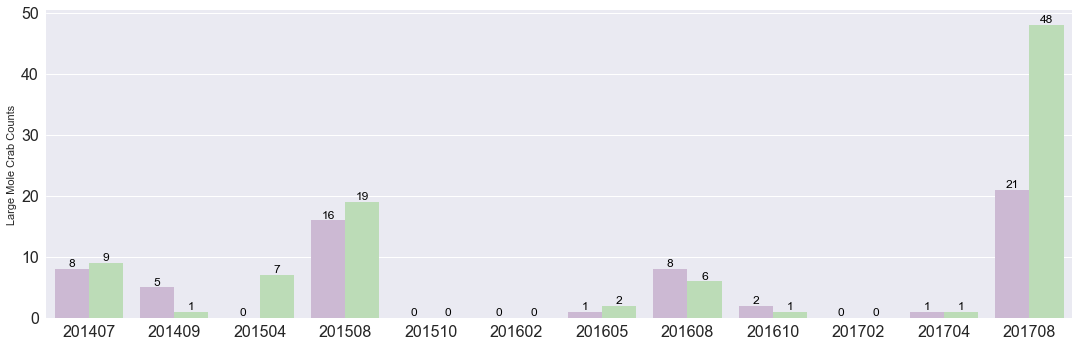

In [58]:
g = sns.factorplot(x="survey", y="large_mole_crabs", hue="group", data=df,
                    size=5, aspect=3, estimator=sum, kind="bar", 
                   hue_order=['control','treatment'], ci=None, legend=False, palette="PRGn")

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
g.set_axis_labels("", "Large Mole Crab Counts")

# to place the field counts for coquina clams recorded during each of the 12 sampling events
PlotCountsAboveBars()
plt.savefig(plotpath+'Sample_Lg_Mole_Crab_counts_'+latest_survey+'.jpg', dpi=300)

**Coquina Clams**

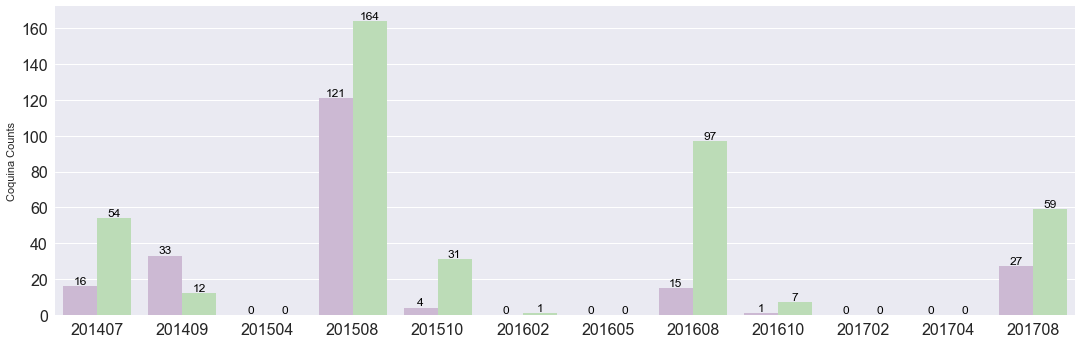

In [59]:
g = sns.factorplot(x="survey", y="coquina", hue="group", data=df,
                    size=5, aspect=3, estimator=sum, kind="bar", 
                   hue_order=['control','treatment'], ci=None, legend=False, palette="PRGn")

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
g.set_axis_labels("", "Coquina Counts")

# to place the field counts for coquina clams recorded during each of the 12 sampling events
PlotCountsAboveBars()

plt.savefig(plotpath+'Coquina_counts_'+latest_survey+'.jpg', dpi=300)

**Amphipods**

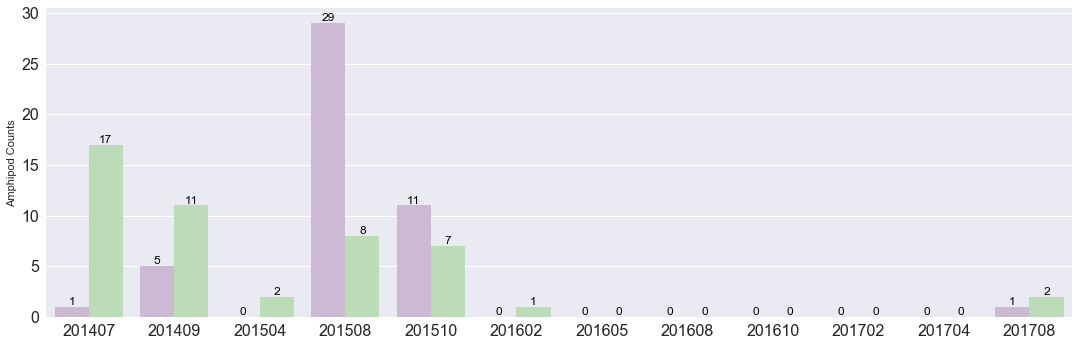

In [60]:
g = sns.factorplot(x="survey", y="amphipods", hue="group", data=df,
                    size=5, aspect=3, estimator=sum, kind="bar", 
                   hue_order=['control','treatment'], ci=None, legend=False, palette="PRGn")

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
g.set_axis_labels("", "Amphipod Counts")

# to place the field counts for amphipods recorded during each of the 12 sampling events
PlotCountsAboveBars()

plt.savefig(plotpath+'amphipod_counts_'+latest_survey+'.jpg', dpi=300)

**Polychaete Worms**

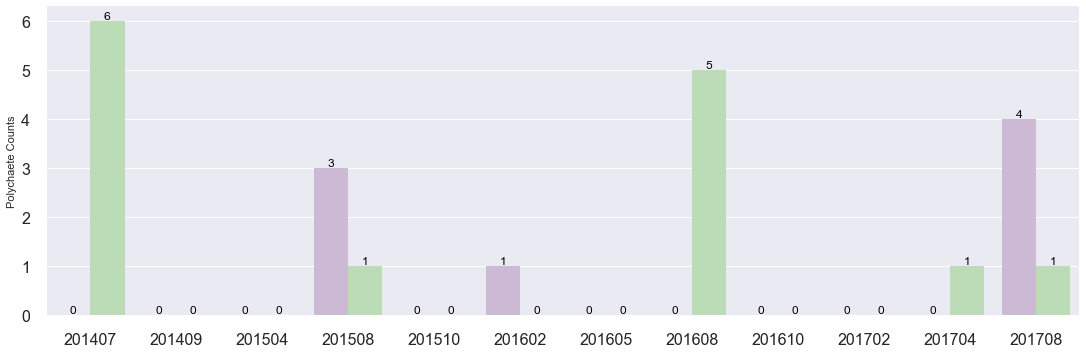

In [61]:
#figpg = plt.figure(figsize=(15,5))
#axspg = figpg.add_subplot(1,1,1)
#figpg.tight_layout(pad=5.1, w_pad=0.5, h_pad=2.0)

#sns.set_color_codes("pastel")
g = sns.factorplot(x="survey", y="worms", hue="group", data=df, size=5, aspect=3, 
                   estimator=sum, kind="bar", hue_order=['control','treatment'], 
                   ci=None, legend=False, palette="PRGn")     
sns.despine(offset=10, trim=True)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
g.set_axis_labels('',"Polychaete Counts")
#g.set_ylabel("Polychaete Mean Counts", fontsize=16)     
#g.legend_.remove()

# to place the field counts for polychaete worms recorded during each of the 12 sampling events
PlotCountsAboveBars()

plt.savefig(plotpath+'polychaete_counts_'+latest_survey+'.jpg', dpi=300)     

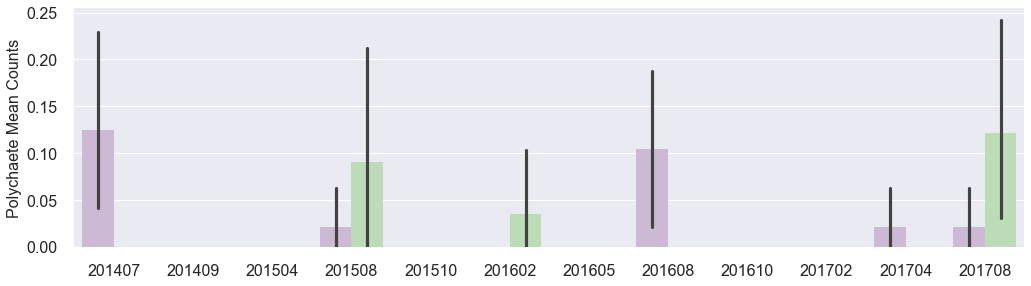

In [62]:
### Bar plot means with 95% CI  Draws mean value bars. This has been, for now anyway, 
### superceded by the counts plot code in the cell above...

figpg = plt.figure(figsize=(15,5))
axspg = figpg.add_subplot(1,1,1)
figpg.tight_layout(pad=5.1, w_pad=0.5, h_pad=2.0)

sns.set_color_codes("pastel")
axb = sns.barplot(x="survey", y="worms", hue="group", data=df, palette="PRGn")     
sns.despine(offset=10, trim=True)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
axb.set_xlabel('')
axb.set_ylabel("Polychaete Mean Counts", fontsize=16)     
axb.legend_.remove()

plt.savefig(plotpath+'Sample_Polychaete_means_'+latest_survey+'.jpg', dpi=300)

**The End**